In [ ]:
# If "import" commands result in modules not found, install via below pip commands before import 

In [ ]:
# S3FS might not be readily installed

!pip3 install s3fs 

In [ ]:
# H5NETCDF might not be readily installed

!pip3 install h5netcdf

In [ ]:
# XARRAY might not be readily installed

!pip3 install xarray

In [ ]:
# Cartopy (requires GEOS) might not be readily installed

!pip3 install geos
!pip3 install cartopy

In [ ]:
!pip3 install "dask[dataframe]"

In [ ]:
!pip3 install matplotlib

In [1]:
import s3fs
import xarray as xr
import numpy as np
import pandas as pd
import h5netcdf
import h5netcdf.legacyapi as netCDF4
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Loading a test file from CSC S3 service:

s3 = s3fs.S3FileSystem(anon=True, client_kwargs=dict(endpoint_url="https://a3s.fi"))

# CCN concentration from EC-Earth/TM5 for year 2009
s3path = 's3://CRiceS-test/EC-Earth_CCN_1.00_2009.nc' 
    
remote_files = s3.glob(s3path)

# Iterate through remote_files to create a fileset
fileset = [s3.open(file) for file in remote_files]

# Open dataset as XArray
data = xr.open_mfdataset(fileset)

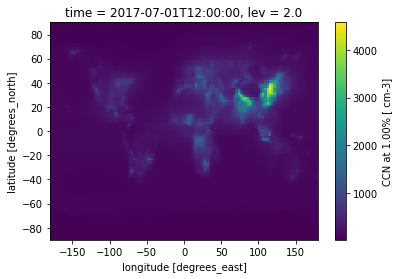

In [12]:
data["CCN1.00"].isel(lev=1).squeeze().plot.pcolormesh()
